In [16]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import glob as gb
import os

%matplotlib inline

In [17]:
sample = "T8"

df = pd.DataFrame()

# Get list of folders
folders = gb.glob("Data/" + sample + "/*/")
for folder in folders:
#     print(file)
    
    # Load HDF file
    df_file = pd.read_csv(folder + '/analysis.csv')
    
    # Add sweep data to measurement dataframe
    df = df.append(df_file)
    
# Sort rows by datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()
df = df.reset_index()
df.head()

,datetime,Unnamed: 0,chip,concentration,fs,humidity,medium,sample_no,sweep_no,sweeps,tempC,timeID,tau
0,2016-05-26 15:10:37.647495,0,T8,NaN,0.0001,40.86,Air,1000,0,600,24.87,1.464272e+09,10.811153
1,2016-05-26 15:10:37.946512,1,T8,NaN,0.0001,40.86,Air,1000,1,600,24.87,1.464272e+09,10.821120
2,2016-05-26 15:10:38.165524,2,T8,NaN,0.0001,40.86,Air,1000,2,600,24.87,1.464272e+09,10.816078
3,2016-05-26 15:10:38.316533,3,T8,NaN,0.0001,40.83,Air,1000,3,600,24.89,1.464272e+09,10.812778
4,2016-05-26 15:10:38.466541,4,T8,NaN,0.0001,40.83,Air,1000,4,600,24.89,1.464272e+09,10.820494


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 13 columns):
datetime         6600 non-null datetime64[ns]
Unnamed: 0       6600 non-null int64
chip             6600 non-null object
concentration    6000 non-null float64
fs               6600 non-null float64
humidity         6600 non-null float64
medium           6600 non-null object
sample_no        6600 non-null int64
sweep_no         6600 non-null int64
sweeps           6600 non-null int64
tempC            6600 non-null float64
timeID           6600 non-null float64
tau              6600 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(2)
memory usage: 670.4+ KB


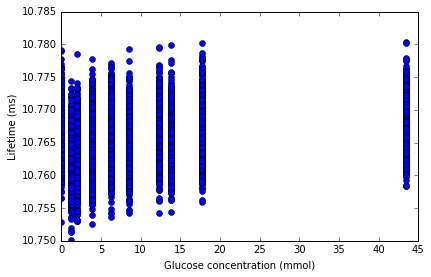

In [20]:
plt.plot(df['concentration'], df['tau'], 'o')
plt.xlabel('Glucose concentration (mmol)')
plt.ylabel('Lifetime (ms)')
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.savefig("Data/" + sample + '/concVsLifetime.png', dpi=1000)

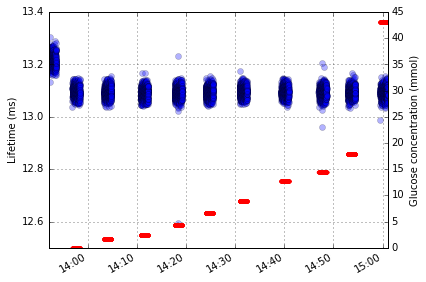

In [12]:
fig, ax = plt.subplots()
ax.plot(df['datetime'], df['tau'], 'o', alpha=0.3)

ax2 = ax.twinx()
ax2.plot(df['datetime'], df['concentration'], 'r.')

# format the x ticks
ax.xaxis.set_major_locator(mdates.MinuteLocator(np.arange(0,60,10)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(mdates.SecondLocator(bysecond=np.arange(0, 60, 10)))

ax.grid(True)
fig.autofmt_xdate()

plt.xlabel('Time (H:M)')
ax.set_ylabel('Lifetime (ms)')
ax2.set_ylabel('Glucose concentration (mmol)')
plt.tight_layout()

plt.savefig("Data/" + sample + '/conc_lifetimeVsTime.png', dpi=1000)

In [21]:
df = df.set_index('datetime')
df.head()

,Unnamed: 0,chip,concentration,fs,humidity,medium,sample_no,sweep_no,sweeps,tempC,timeID,tau
datetime,,,,,,,,,,,,
2016-05-26 15:10:37.647495,0,T8,NaN,0.0001,40.86,Air,1000,0,600,24.87,1.464272e+09,10.811153
2016-05-26 15:10:37.946512,1,T8,NaN,0.0001,40.86,Air,1000,1,600,24.87,1.464272e+09,10.821120
2016-05-26 15:10:38.165524,2,T8,NaN,0.0001,40.86,Air,1000,2,600,24.87,1.464272e+09,10.816078
2016-05-26 15:10:38.316533,3,T8,NaN,0.0001,40.83,Air,1000,3,600,24.89,1.464272e+09,10.812778
2016-05-26 15:10:38.466541,4,T8,NaN,0.0001,40.83,Air,1000,4,600,24.89,1.464272e+09,10.820494


In [22]:
df_plot = df[['concentration', 'tau', 'tempC', 'humidity']]

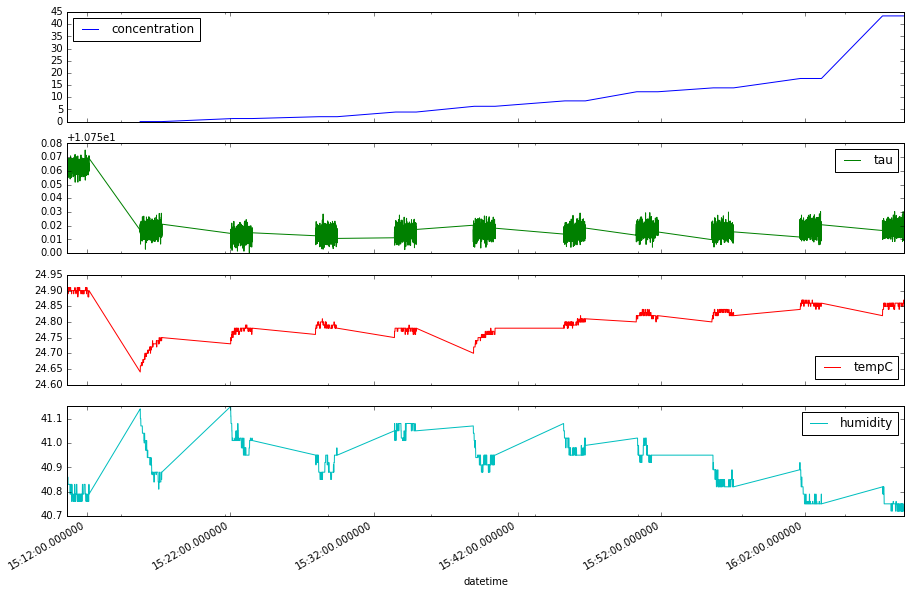

In [23]:
df_plot.plot(subplots=True, layout=(-1, 1), figsize=(15, 10), sharex=True)
fig.autofmt_xdate()
plt.ticklabel_format(useOffset=False, axis='y')
plt.savefig("Data/" + sample + '/overview.png', dpi=1000)